### Introduction

Use LeNet-5 CNN architecture to classify traffic sign images.
There are 43 classes in the dataset.

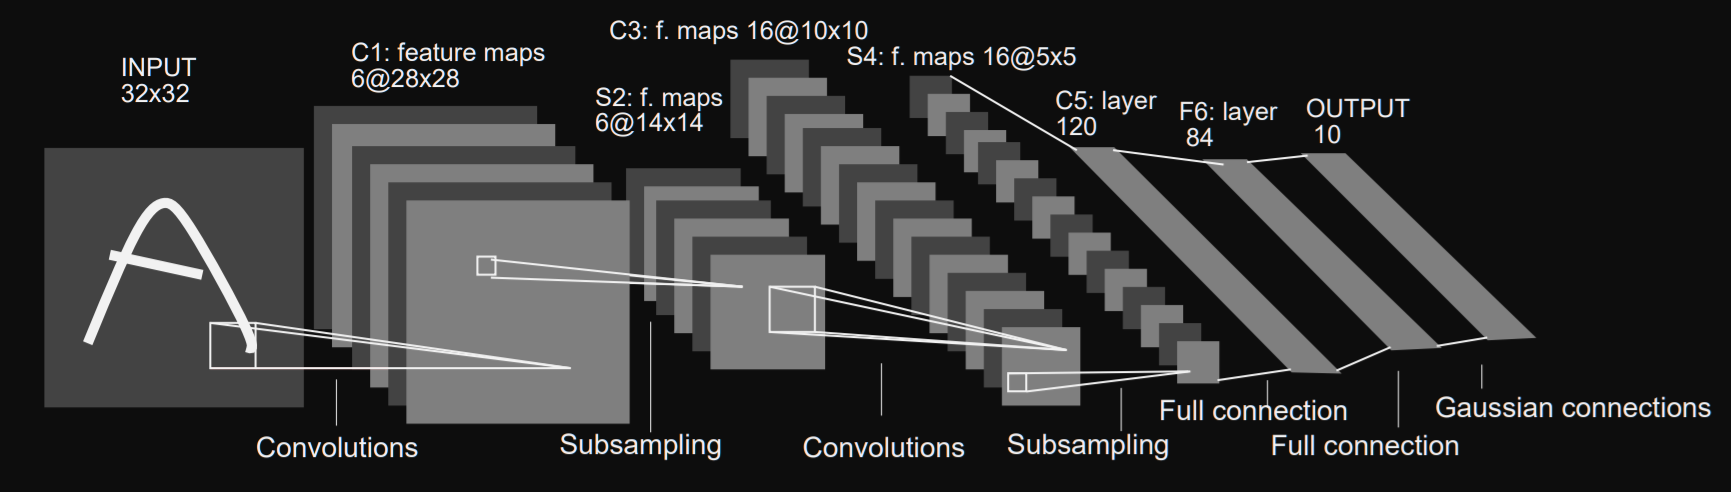

### Import data and visualize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline


In [2]:
import pickle

In [4]:
!ls

sample_data  test.p  train.p  valid.p


In [5]:
with open("./train.p", mode='rb') as train:
    train = pickle.load(train)

In [7]:
with open("./test.p", mode='rb') as test:
    test = pickle.load(test)

with open("./valid.p", mode='rb') as validation:
    validation = pickle.load(validation)

In [9]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [10]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

In [15]:
X_train.shape

(34799, 32, 32, 3)

In [17]:
y_train.shape

(34799,)

In [16]:
X_test.shape

(12630, 32, 32, 3)

In [18]:
y_test.shape

(12630,)

In [19]:
X_validation.shape

(4410, 32, 32, 3)

In [20]:
y_validation.shape

(4410,)

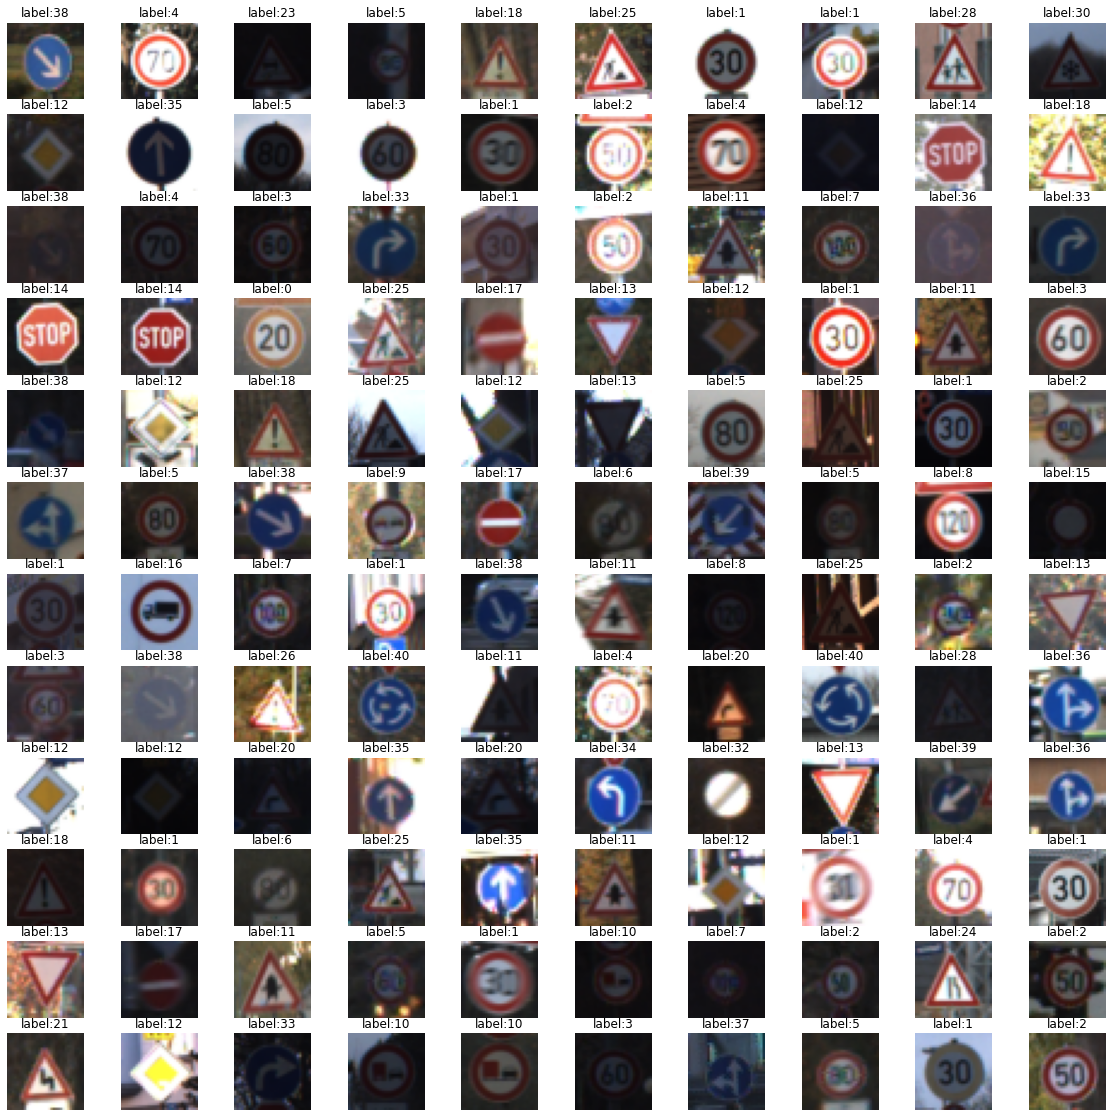

In [23]:
# show several images at the same time

width=12
length=10

# create grids
fig,ax=plt.subplots(width, length, figsize=(20,20))

# flatten array for grids
ax=ax.ravel()

#number of images in training data
num_img=len(X_train)


# for each position in the grids, place/show a training image randomly there
for i in np.arange(0, width*length):
  img_index=np.random.randint(0,num_img)
  ax[i].imshow(X_train[img_index])
  ax[i].axis('off')
  ax[i].set_title("label:{}".format(y_train[img_index]))


### Preprocessing: shuffle images in training, turn images into grayscale, normalize data

In [24]:
# shuffle images in training

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)



In [25]:
# Turn image data into grayscale by averaging over 3 channels

X_train_gray= np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray=np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray=np.sum(X_test/3, axis=3, keepdims=True)


In [26]:
X_train_gray.shape

(34799, 32, 32, 1)

In [27]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [28]:
X_test_gray.shape

(12630, 32, 32, 1)

In [29]:
# normalize data so that values between 0 and 1

X_train_gray_norm=X_train_gray/255
X_validation_gray_norm=X_validation_gray/255
X_test_gray_norm=X_test_gray/255


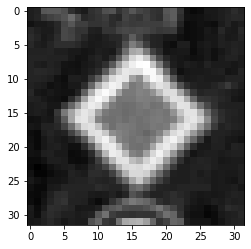

In [39]:
plt.imshow(X_train_gray_norm[100].squeeze(), cmap='gray')

### Define model and train

In [61]:
tf.keras.backend.clear_session()

from keras.models import Sequential
from keras import layers

In [62]:
model=Sequential()

model.add(layers.Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [63]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [66]:
epochs=50

In [64]:
history = model.fit (
    X_train_gray_norm,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_data=(X_validation_gray_norm, y_validation),
    shuffle=True,
    verbose=1
  )

Epoch 1/50
544/544 [==============================] - 2s 3ms/step - loss: 2.7476 - accuracy: 0.2642 - val_loss: 0.9402 - val_accuracy: 0.7163
Epoch 2/50
544/544 [==============================] - 2s 3ms/step - loss: 0.6219 - accuracy: 0.8251 - val_loss: 0.6060 - val_accuracy: 0.8265
Epoch 3/50
544/544 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.9017 - val_loss: 0.4899 - val_accuracy: 0.8698
Epoch 4/50
544/544 [==============================] - 2s 3ms/step - loss: 0.2545 - accuracy: 0.9309 - val_loss: 0.4687 - val_accuracy: 0.8721
Epoch 5/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1815 - accuracy: 0.9522 - val_loss: 0.4481 - val_accuracy: 0.8844
Epoch 6/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1487 - accuracy: 0.9604 - val_loss: 0.4454 - val_accuracy: 0.8846
Epoch 7/50
544/544 [==============================] - 2s 3ms/step - loss: 0.1182 - accuracy: 0.9684 - val_loss: 0.4197 - val_accuracy: 0.8980
Epoch 

with batch size 64, 50 epochs, train accuracy reaches 99.6%, and validation accuracy reaches 93%. 

### Evaluation

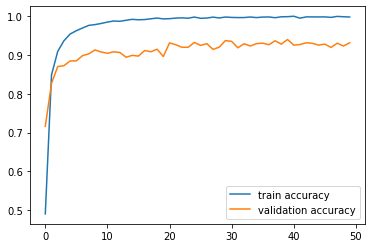

In [67]:
# plot train and validation accuracy


train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(np.arange(0,epochs),train_acc)
plt.plot(np.arange(0,epochs),val_acc)
plt.legend(['train accuracy','validation accuracy'])

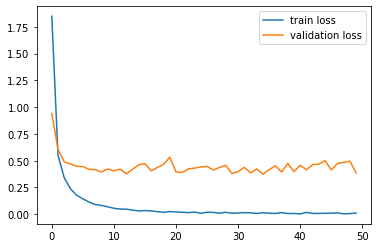

In [68]:
#plot loss

train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(np.arange(0,epochs),train_loss)
plt.plot(np.arange(0,epochs),val_loss)
plt.legend(['train loss','validation loss'])

In [69]:
# predict on test dataset


y_pred=model.predict_classes(X_test_gray_norm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [74]:
from sklearn.metrics import accuracy_score

pred_accuracy=accuracy_score(y_test, y_pred)
print("test accuracy:{}".format(pred_accuracy))

test accuracy:0.911243072050673
